**ECOM90025 Assignment 2**

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # For saving/loading models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

In [227]:
url_train = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/train.csv"
url_test = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/test.csv"
url_submission = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/sample_submission.csv"

Functions 

In [228]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [229]:
# Define function to plot model coefficients
def plot_coefficients(model, feature_names, model_name):
    plt.figure(figsize=(10, 6))
    
    if hasattr(model, 'coef_'):
        # Linear Regression or other linear models
        coefs = model.coef_
        plt.bar(range(len(coefs)), coefs, tick_label=feature_names)
        plt.title(f'Coefficients of {model_name}')
        plt.xlabel('Features')
        plt.ylabel('Coefficient Value')
        plt.xticks(rotation=90)
    elif hasattr(model, 'feature_importances_'):
        # RandomForestRegressor or other models with feature importances
        importances = model.feature_importances_
        plt.bar(range(len(importances)), importances, tick_label=feature_names)
        plt.title(f'Feature Importances of {model_name}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=90)
    else:
        print(f"Model {model_name} does not have coefficients or feature importances.")
    
    plt.tight_layout()
    plt.show()

In [230]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'RidgeCV': RidgeCV(),
    'LassoCV': LassoCV(random_state=2001),
    # 'Random Forest': RandomForestRegressor(n_estimators=100, random_state=2001)
}

**Part 1**

Read the training sample to a Pandas dataframe.

In [231]:
df_train = pd.read_csv(url_train, index_col=0)

In [232]:
df_train.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
ID,,,,,,,,,,,,,,,,,,,,,
0,0.532053,-0.148821,0.549597,0.272469,-0.901925,1.772201,-0.349480,-0.343701,0.190422,-0.834592,...,0.164693,-0.890457,0.781842,1.123592,-0.275561,-1.056807,0.299572,-1.639389,-1.517434,1.413109
1,5.184914,2.014094,-0.093027,-0.362052,0.456102,1.061241,-1.067338,0.643531,0.349825,-1.280970,...,-0.761800,-0.274411,0.673035,-0.631399,1.079935,0.839400,-0.042490,-0.588538,-0.456224,-2.120965
2,-1.432569,0.838779,-2.688285,-1.379352,-1.053576,-0.150720,1.079090,0.300199,0.234107,0.223405,...,0.299277,-0.186497,-1.439135,-0.744982,-0.577295,0.629026,0.349651,-0.014912,-0.007519,0.158457
3,5.187497,0.830986,-0.887702,1.387495,-0.228950,-1.753283,0.055467,1.159491,-2.459410,-1.363846,...,-0.470508,-0.801736,-0.325791,-0.757732,0.318284,-1.736215,-1.505948,0.207231,0.897713,0.664534
4,7.141232,1.209247,0.614855,-0.999241,-0.170428,-0.517563,-0.391593,-1.183876,0.907440,-0.287905,...,0.492473,-0.276980,-0.419119,0.025664,-0.165303,0.623124,1.151711,-0.622249,-0.873814,-1.110714


In [233]:
# Separate features and target variable
X = df_train.drop(columns=['Y'])
y = df_train['Y']

Default

In [234]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 2001)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (980, 40)
The dimension of X_test is (420, 40)


In [235]:
# Train models and evaluate
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"R^2 Score: {metrics['R2']:.4f}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error: 9.7222
R^2 Score: 0.4333
------------------------------
Model: RidgeCV
Mean Squared Error: 9.6949
R^2 Score: 0.4349
------------------------------
Model: LassoCV
Mean Squared Error: 9.3286
R^2 Score: 0.4562
------------------------------


Scaled Variables

In [236]:
# Scale variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [237]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state= 2001)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (980, 40)
The dimension of X_test is (420, 40)


In [238]:
# Train models and evaluate
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"R^2 Score: {metrics['R2']:.4f}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error: 9.7222
R^2 Score: 0.4333
------------------------------
Model: RidgeCV
Mean Squared Error: 9.6947
R^2 Score: 0.4349
------------------------------
Model: LassoCV
Mean Squared Error: 9.3335
R^2 Score: 0.4559
------------------------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


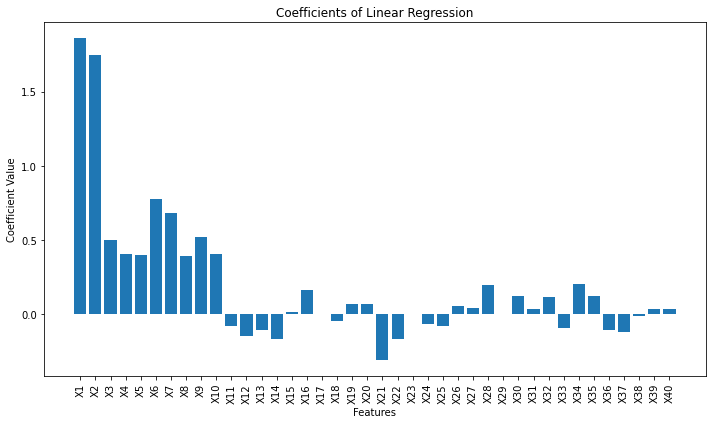

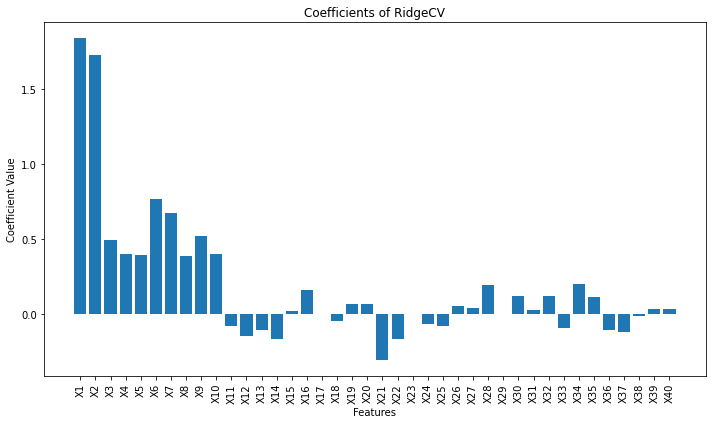

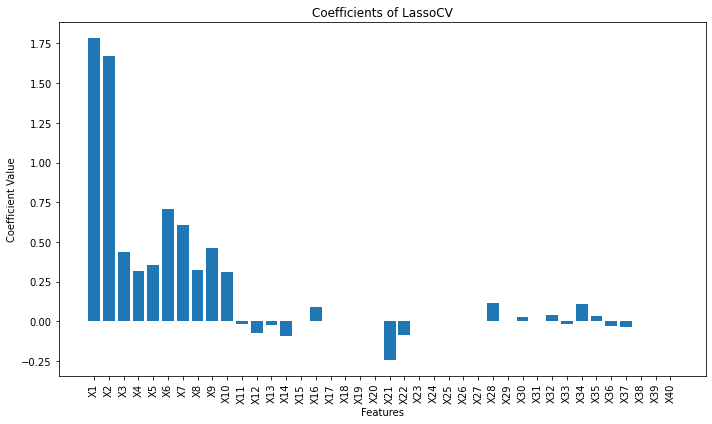

In [239]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

# Extract feature names
feature_names = X.columns

# Plot coefficients or feature importances
for name, model in models.items():
    plot_coefficients(model, feature_names, name)

Ensemble Methods

In [240]:
df_test = pd.read_csv(url_test, index_col=0)

df_test.head()

# Preprocess new data
X_new = df_test
X_new_scaled = scaler.transform(X_new)

# Make predictions
predictions_dict = {}
for name, model in models.items():
    predictions_dict[name] = model.predict(X_new_scaled)

predictions_df = pd.DataFrame(predictions_dict)
predictions_df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


,Linear Regression,RidgeCV,LassoCV
0,2.817603,2.812612,2.857201
1,-3.462101,-3.400779,-2.968049
2,-1.026990,-0.999403,-0.908373
3,-4.686760,-4.624071,-4.342144
4,1.746898,1.751049,2.071226
...,...,...,...
595,5.569078,5.531588,5.492060
596,-1.113100,-1.078595,-0.545057
597,4.850898,4.822072,5.432600
598,4.380508,4.348986,3.892766


In [243]:
predictions_df['Ensemble'] = predictions_df[['Linear Regression', 'RidgeCV', 'LassoCV']].mean(axis=1)

ensemble_df = pd.DataFrame(predictions_df, columns=['Ensemble']).values

df_submission = pd.read_csv(url_submission, index_col=0)

df_submission["Y"] = ensemble_df

df_submission.head(5)

,Y
ID,
1400,2.829139
1401,-3.276976
1402,-0.978255
1403,-4.550992
1404,1.856391


In [244]:
df_submission.to_csv('submission.csv', index=True)
print("Predictions have been saved to 'submission.csv'.")

Predictions have been saved to 'submission.csv'.


Feature Engineering

In [245]:
# Feature engineering
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [246]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size = 0.3, random_state= 2001)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (980, 860)
The dimension of X_test is (420, 860)


In [247]:
# Train models and evaluate
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"R^2 Score: {metrics['R2']:.4f}")
    print("-" * 30)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Model: Linear Regression
Mean Squared Error: 42.6900
R^2 Score: -1.4885
------------------------------
Model: RidgeCV
Mean Squared Error: 25.4436
R^2 Score: -0.4832
------------------------------
Model: LassoCV
Mean Squared Error: 6.6779
R^2 Score: 0.6107
------------------------------


In [248]:
# Identify the best model based on R^2 score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]

# Save the best model and preprocessing steps
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(poly, 'poly_transformer.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Part 4**

Get the test sample for prediction and submit your results on Kaggle to get your Kaggle score screenshot. Show the screenshot in the PDF file.

In [249]:
df_test = pd.read_csv(url_test, index_col=0)

df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
ID,,,,,,,,,,,,,,,,,,,,,
1400,1.383526,-0.604793,1.229863,-0.001352,-1.091974,-0.183959,-0.382246,-0.585346,0.551234,-0.398677,...,-1.910952,1.880733,-1.707715,0.132710,-0.711017,-0.068873,-0.412101,0.718531,-0.046361,0.910999
1401,-1.805525,-1.209279,1.105605,-0.725072,1.406829,0.277594,0.351573,0.301992,-0.895749,-1.252861,...,-0.187775,0.321442,0.608835,0.133486,0.860403,0.545383,-0.469797,2.558656,-0.042992,0.299610
1402,-1.283231,0.378460,-1.042752,-0.392231,-0.152843,-0.150497,0.323036,-0.334631,-0.915000,-0.462906,...,0.063054,-0.673070,-0.165475,-0.925128,0.435305,-0.069939,-1.830001,0.654577,-0.586005,2.719760
1403,-1.429619,-1.219039,0.271909,-1.200966,-1.862797,-0.976227,0.502075,0.371877,-0.909261,0.452577,...,1.948860,-0.133037,0.192492,-0.809552,-0.847134,-0.449216,0.367976,-0.584823,-0.938930,0.800756
1404,1.050303,-0.287341,1.076935,-1.607133,2.728414,0.295277,-2.175289,-1.336138,-0.652193,-0.685130,...,1.204753,1.024312,-0.388220,0.480520,-2.318158,0.096818,-2.005192,-0.543147,0.427429,1.666733


Preprocess new data

In [250]:
# Preprocess new data
X_new = df_test
X_new_poly = poly.transform(X_new)
X_new_scaled = scaler.transform(X_new_poly)

In [251]:
# Load the best model
best_model = joblib.load('best_model.pkl')

In [252]:
# Make predictions
predictions = best_model.predict(X_new_scaled)

In [253]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions']).values

In [254]:
df_submission = pd.read_csv(url_submission, index_col=0)

df_submission["Y"] = predictions_df

df_submission.head(5)

,Y
ID,
1400,2.554394
1401,-1.893090
1402,-1.283911
1403,-1.312860
1404,-1.283951


In [255]:
df_submission.to_csv('submission.csv', index=True)
print("Predictions have been saved to 'submission.csv'.")

Predictions have been saved to 'submission.csv'.
